Требуется оценить перспективность продаж по игровым платформам

## Обзор данных

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import factorial
from scipy.stats import norm
from scipy import stats as st
import scipy.stats
import math
import warnings
warnings.filterwarnings("ignore")

In [44]:
data_frame=pd.read_csv('/datasets/games.csv')
data_frame.info() 
data_frame.head(10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


## Предобработка данных

Проверка пропусков

In [45]:
null_data_columns=data_frame.isna().sum()
columns_data_old=list(data_frame.columns) 
display(null_data_columns)
null_data_columns=list(null_data_columns) 

print('Доля пропусков в столбце:') 
for i in range(len(columns_data_old)): 
    rezul=1-(len(data_frame)-null_data_columns[i])/len(data_frame)
    print(columns_data_old[i], '=', f'{rezul:.2%}' )

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Доля пропусков в столбце:
Name = 0.01%
Platform = 0.00%
Year_of_Release = 1.61%
Genre = 0.01%
NA_sales = 0.00%
EU_sales = 0.00%
JP_sales = 0.00%
Other_sales = 0.00%
Critic_Score = 51.32%
User_Score = 40.09%
Rating = 40.48%


**Вывод**
В столбце Name (название игры) пропуски можно не заполнять т.к. они не повлияют на результат
В столбце Year_of_Release (год выпуска) пропуски заменить нечем, разве что проводить поиск по открытым источникам и заменять в ручную, достаточно трудоемко, поэтому удалить
В столбце Genre (жанр игры) есть 2 пропуска, данный столбец нам важен, но 2 пропуска можно удалить 
В столбце Critic_Score  (оценка критиков) 51% пропусков, что достаточно много, нужно будет разбираться, возможно не все игры получили оценки критиков.
В столбце User_Score (оценка пользователей) 40%  что достаточно много, нужно будет разбираться, возможно не все игры получили оценки пользователей.
В столбце Rating (рейтинг от организации ESRB) 40.5% пропусков, что тоже много нужно будет разбираться по ходу. Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. 

In [46]:
data_frame.columns =data_frame.columns.str.lower()  

In [47]:
data_frame = data_frame.dropna(subset=['name'])

null_data_columns=data_frame.isna().sum() 
columns_data_old=list(data_frame.columns) 

data_frame = data_frame.dropna(subset=['year_of_release']) 
data_frame['year_of_release']=data_frame['year_of_release'].astype('int') 

for i in range(len(data_frame)):
    data_frame.loc[(data_frame.user_score =='tbd'), 'user_score'] = -1 

In [48]:

data_frame['user_score']=data_frame['user_score'].fillna(-1) 
data_frame['rating']=data_frame['rating'].fillna('N/R')

data_frame['user_score']=data_frame['user_score'].astype('float') 
data_frame['critic_score']=data_frame['critic_score'].fillna(-1)
data_frame['critic_score']=data_frame['critic_score'].astype('float')

data_frame['na_sales']=data_frame['na_sales'].astype('float')  
data_frame['eu_sales']=data_frame['eu_sales'].astype('float')  
data_frame['jp_sales']=data_frame['jp_sales'].astype('float')  
data_frame['other_sales']=data_frame['other_sales'].astype('float') 
data_frame['year_of_release']=data_frame['year_of_release'].astype('int') 


In [49]:
data_frame['all_sales']=data_frame['na_sales']+data_frame['eu_sales']+data_frame['jp_sales']+data_frame['other_sales']
display(data_frame.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,N/R,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,N/R,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,N/R,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,N/R,28.31


**Вывод**
 Так же были изменен тип данных для  оценок и количества проданных копий на float. Тип данных для года выхода игры был заменен на integer, т.к является целочисленным.

##  Анализ данных

<AxesSubplot:xlabel='year_of_release'>

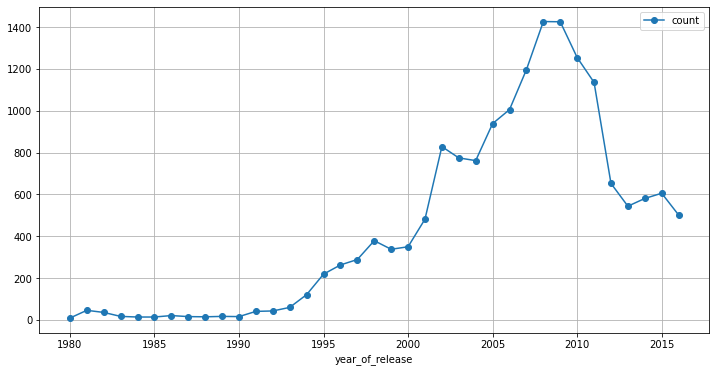

In [50]:
year_release_count=data_frame.groupby(['year_of_release'])['name'].count().reset_index()
year_release_count.plot(x='year_of_release', y='name',style='o-' ,grid=True, label='count',figsize=(12, 6))

**Вывод**
Статистика количества вышедших игр по годам говорит, что  наиболее интересным является период с 2000 по 2016 годы, когда активно развивался игрострой.

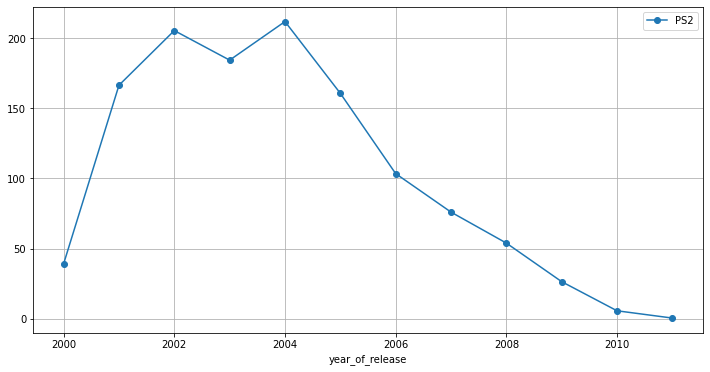

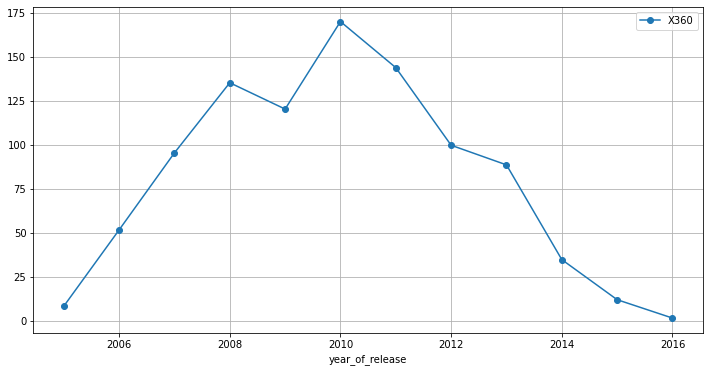

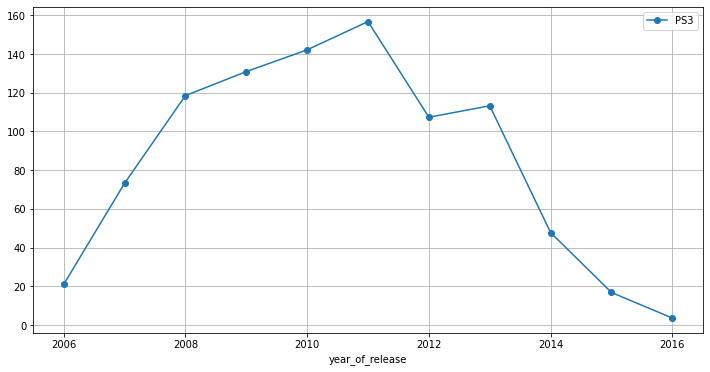

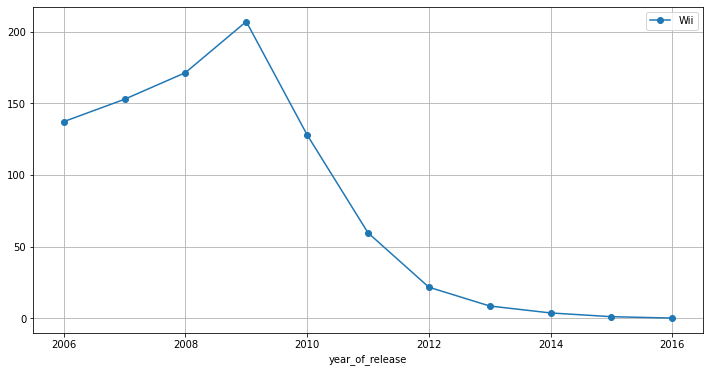

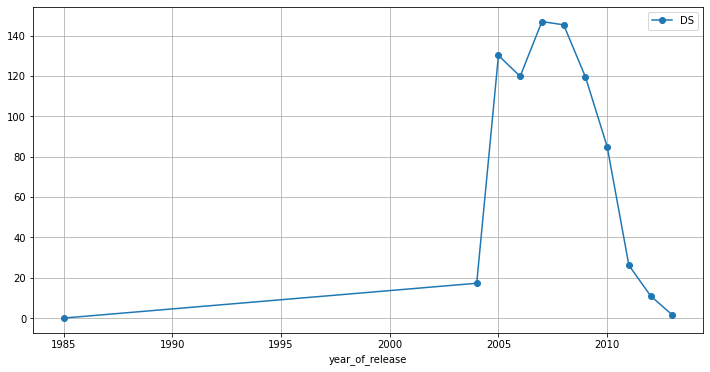

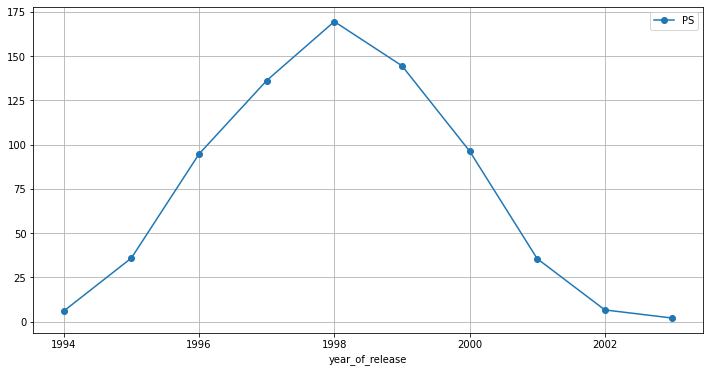

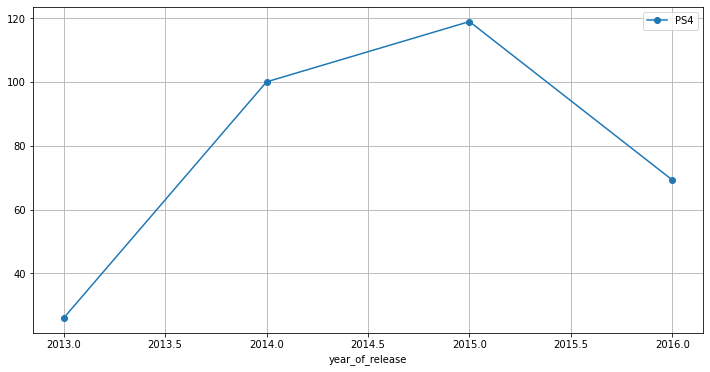

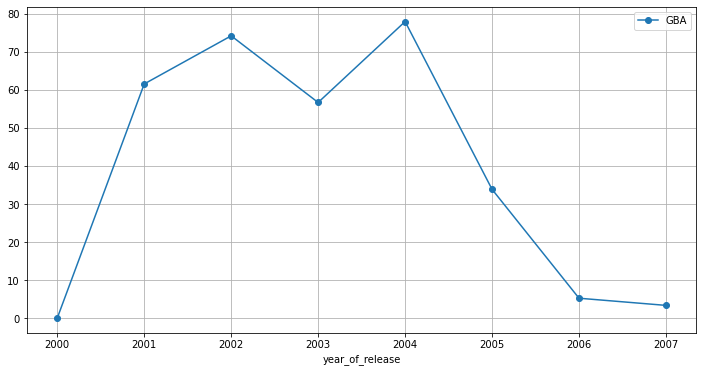

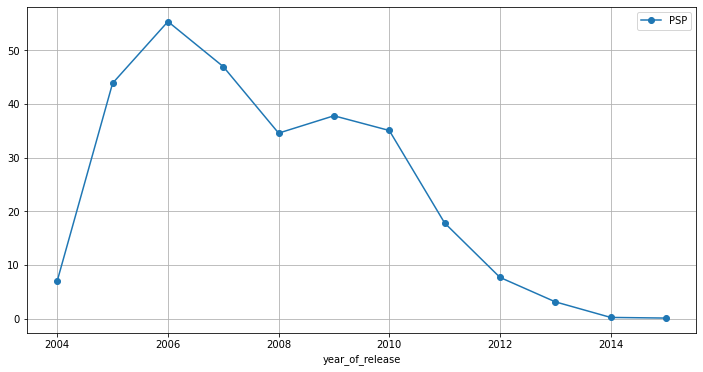

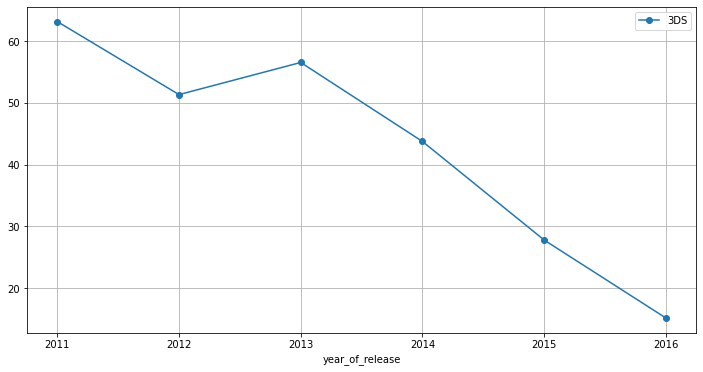

In [51]:
# сводная таблица по платфомам и проданным копиям в разных регионах
year_platform_sale=data_frame.pivot_table(index=['platform','year_of_release'], values=['na_sales','eu_sales','jp_sales','other_sales'], aggfunc= 'sum').reset_index()
# общаяя сумма проданных копий млн. шт.
year_platform_sale['all_sales']=year_platform_sale['na_sales']+year_platform_sale['eu_sales']+year_platform_sale['jp_sales']+year_platform_sale['other_sales']

top_platform_set=year_platform_sale.pivot_table(index='platform', values='all_sales', aggfunc='sum') #сумма за все время по платформам
top_platform_set =top_platform_set .sort_values(by='all_sales', ascending=False)#сортировка по убыванию
top_platform=list(top_platform_set.index[0:10]) #список топовых платформ
top_platform_sale = data_frame[data_frame['platform'].isin(top_platform)].reset_index(drop=True) #Срез по условию топ платформ

top_platform_val=top_platform_sale.pivot_table(index=['platform','year_of_release'], values='all_sales', aggfunc= ['sum']).reset_index()  
top_platform_val.columns = ['platform','year_of_release','all_sales']
for i in range(len(top_platform)):
    j=top_platform[i]
    top_platform_t=top_platform_val.query('platform == @j')
    top_platform_t.plot(x='year_of_release', y='all_sales',style='o-' ,grid=True, label=j,figsize=(12, 6))

**Вывод**
1. PS появилась в 1994 году набирала популярность около 2 лет, а теряла популярность около 3 лет, продолжительность существования 9 лет
2. PS2 появилась в 2000 году набирала популярность за 2 года, а теряла популярность в течении 3-х лет, продолжительность существования 11 лет
3. PS3 появилась в 2006 году набирала популярность около 2 лет, а теряла популярность около 2 лет, продолжительность существования 10 лет
4. PS4 появилась в 2013 году набирала популярность около 2 лет, существует по сей день, можно предположить, что поддержка закончится в 2023 году
5. X360 появилась в 2005 году набирала популярность около 3 лет, а теряла популярность около 2 - 3 лет, продолжительность существования 11 лет
6. Wii появилась в 2006 году набирала популярность около 2 лет, а теряла популярность около 4 лет, продолжительность существования 10 лет
7. DS появилась в 1985 году начала набирать популярность 2004 года, а теряла популярность около 2 лет, продолжительность существования 28 лет
8. GBA появилась в 2000 году набирала популярность около 2 лет, а теряла популярность около 2 лет, продолжительность существования 7 лет
9. PSP появилась в 2004 году набирала популярность около 2 лет, а теряла популярность около 3 лет, продолжительность существования 11 лет
10. 3DS появилась в 2011, была уже популярна,  а теряла популярность примерно за 1 год, продолжительность существования 5 лет
Продолжительность поддержки консолей составляет около 10 лет. Новые консоли выходят примерно раз в 5-6 лет.

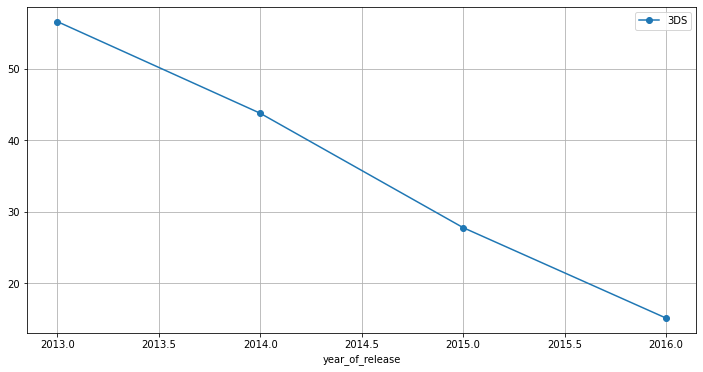

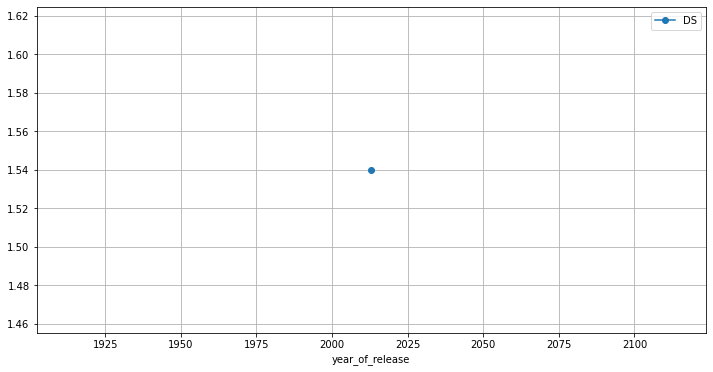

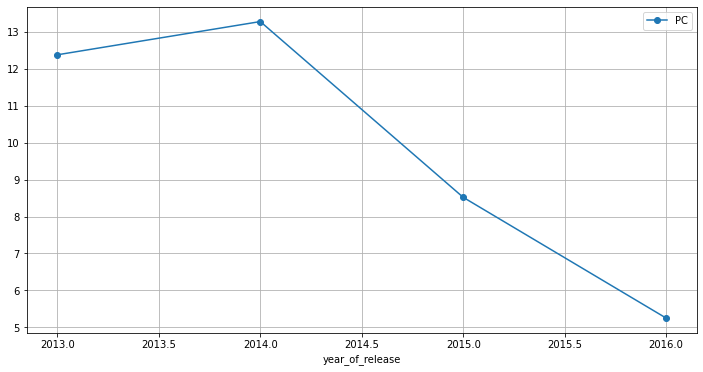

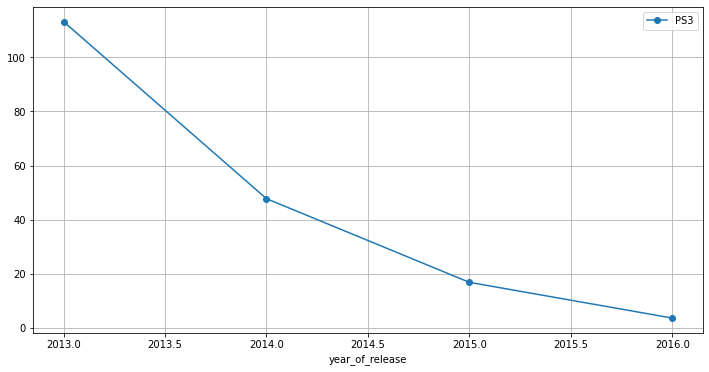

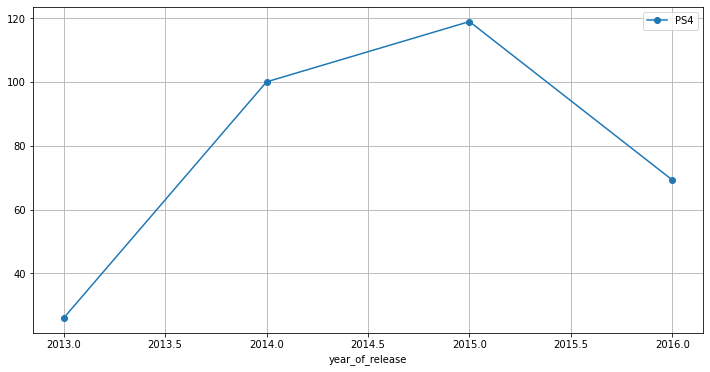

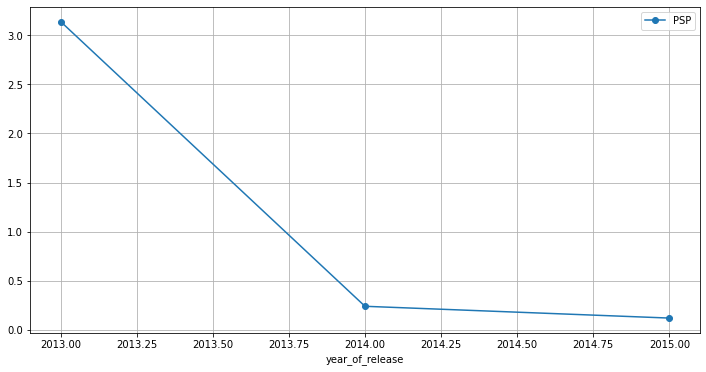

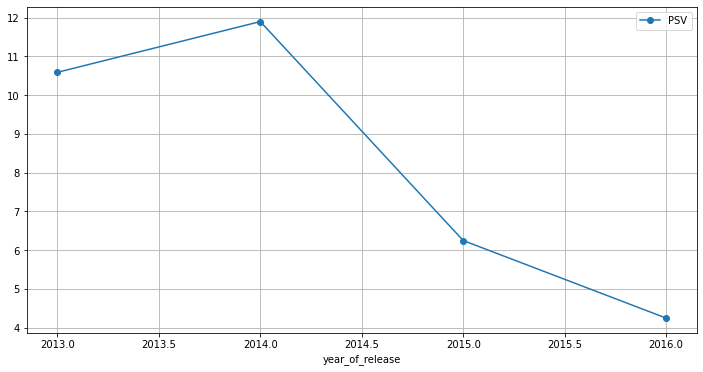

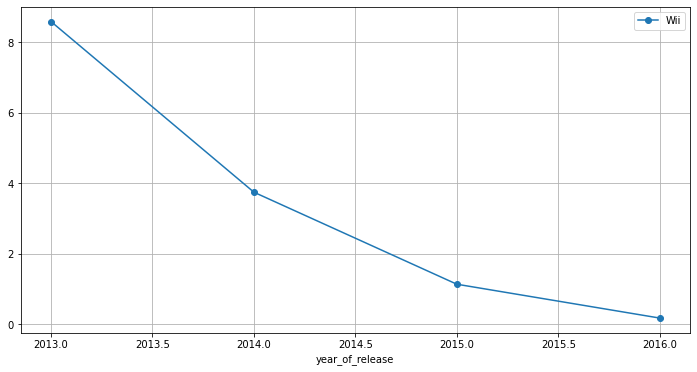

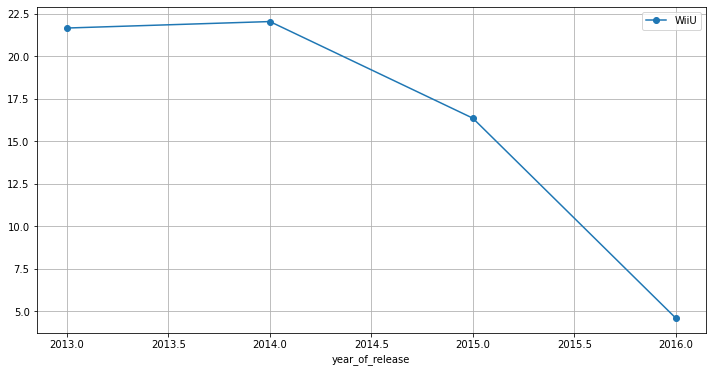

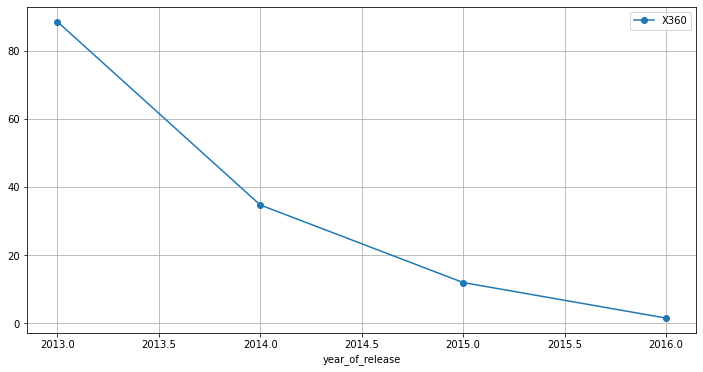

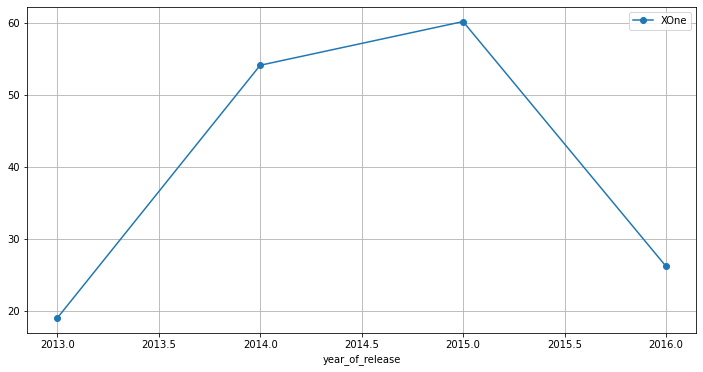

In [52]:
year_platform_sale=year_platform_sale[year_platform_sale['year_of_release']>=2013] #срез по условию актульного периода 3 года
platform=year_platform_sale['platform'].unique() # список платформ

for i in range(len(platform)):
    j=platform[i]
    platform_t=year_platform_sale.query('platform == @j')
    platform_t.plot(x='year_of_release', y='all_sales',style='o-' ,grid=True, label=j,figsize=(12, 6)) # графики продаж

**Вывод**

1. 3DS продажи сатабильно падают, большой прибыли ожидать не стоит
2. DC продажи остановлены
3. DS  продажи остановлены
4. GBA  продажи остановлены
5. GC  продажи остановлены
6. PC  продажи падают, большой прибыли ожидать не стоит
7. PS2 продажи остановлены
8. PS3 продажи падают, большой прибыли ожидать не стоит
9. PS4 продажи падают, но оборот еще достаточно большой 
10. PSP продажи остановлены
11. PSV продажи падают и находятся на уровне минимальных
12. Wii продажи остановлены
13. WiiU продажи остановлены
14. X360 продажи остановлены
15. XB продажи остановлены
16. XOne продажи падают, большой прибыли ожидать не стоит
Таким образом на 2017 год наиболее перспективной ожидается платформа  PS4, так же можно ожидать не большую прибыль от платформ PC, XOne, 3DS

Для перспективных платформ

,name,all_sales
31,Call of Duty: Black Ops 3,14.63
42,Grand Theft Auto V,12.62
77,FIFA 16,8.58
87,Star Wars Battlefront (2015),7.98
92,Call of Duty: Advanced Warfare,7.66
94,FIFA 17,7.60
105,Fallout 4,7.17
143,FIFA 15,6.08
154,Destiny,5.64
171,Uncharted 4: A Thief's End,5.39


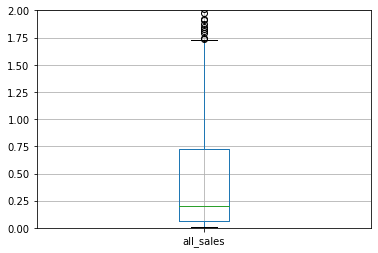

,all_sales
count,392.000000
mean,0.801378
std,1.609456
min,0.010000
25%,0.060000
50%,0.200000
75%,0.730000
max,14.630000


In [53]:
platform_box_PS4=data_frame.query('platform == "PS4"')
platform_box=platform_box_PS4[['name','all_sales']].sort_values(by='all_sales', ascending=False)
display(platform_box.head(10))
ax=platform_box.boxplot()
ax.set_ylim(0, 2)
plt.show()
platform_box.describe()

,name,all_sales
85,The Sims 3,8.01
138,World of Warcraft,6.29
192,Diablo III,5.14
195,Microsoft Flight Simulator,5.11
218,StarCraft II: Wings of Liberty,4.83
273,Warcraft II: Tides of Darkness,4.20
284,Half-Life,4.12
288,World of Warcraft: The Burning Crusade,4.09
313,The Elder Scrolls V: Skyrim,3.88
330,The Sims: Unleashed,3.76


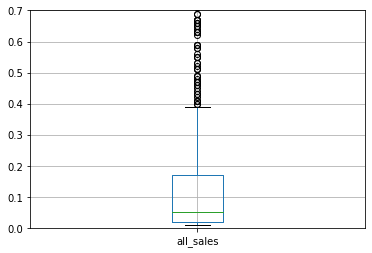

,all_sales
count,957.000000
mean,0.267252
std,0.679745
min,0.010000
25%,0.020000
50%,0.050000
75%,0.170000
max,8.010000


In [54]:
platform_box_PC=data_frame.query('platform == "PC"')
platform_box=platform_box_PC[['name','all_sales']].sort_values(by='all_sales', ascending=False)
display(platform_box.head(10)) 
ax=platform_box.boxplot()
ax.set_ylim(0, 0.7)
plt.show()
platform_box.describe()

,name,all_sales
99,Call of Duty: Black Ops 3,7.39
165,Grand Theft Auto V,5.47
179,Call of Duty: Advanced Warfare,5.26
242,Halo 5: Guardians,4.49
270,Fallout 4,4.22
342,Star Wars Battlefront (2015),3.66
373,Assassin's Creed: Unity,3.50
398,Destiny,3.37
413,Gears of War: Ultimate Edition,3.28
417,FIFA 16,3.25


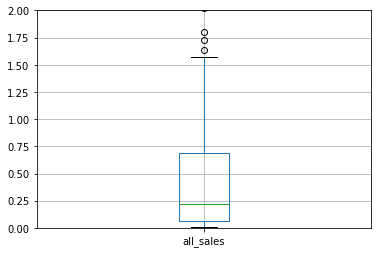

,all_sales
count,247.000000
mean,0.645020
std,1.036139
min,0.010000
25%,0.060000
50%,0.220000
75%,0.685000
max,7.390000


In [55]:
platform_box_XOne=data_frame.query('platform == "XOne"')
platform_box=platform_box_XOne[['name','all_sales']].sort_values(by='all_sales', ascending=False)
display(platform_box.head(10)) 
ax=platform_box.boxplot()
ax.set_ylim(0, 2)
plt.show()
platform_box.describe()

,name,all_sales
33,Pokemon X/Pokemon Y,14.60
40,Mario Kart 7,12.65
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,11.68
53,Super Mario 3D Land,10.81
62,New Super Mario Bros. 2,9.90
73,Animal Crossing: New Leaf,9.17
96,Super Smash Bros. for Wii U and 3DS,7.55
108,Pokemon Sun/Moon,7.14
184,Tomodachi Life,5.22
235,Luigi's Mansion: Dark Moon,4.59


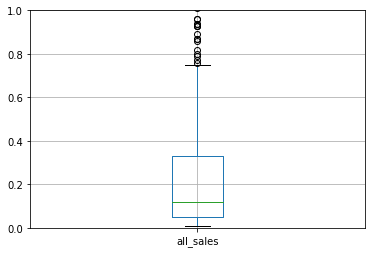

,all_sales
count,512.000000
mean,0.503535
std,1.441271
min,0.010000
25%,0.050000
50%,0.120000
75%,0.332500
max,14.600000


In [56]:
platform_box_3DS=data_frame.query('platform == "3DS"')
platform_box=platform_box_3DS[['name','all_sales']].sort_values(by='all_sales', ascending=False)
display(platform_box.head(10)) 
ax=platform_box.boxplot()
ax.set_ylim(0, 1)
plt.show()
platform_box.describe()

**Вывод**

По полученным данным можно сделать вывод, что игры которые не попадают в "ящик с усами" являются успешными с точки зрения продаж.

,all_sales,critic_score,user_score
all_sales,1.000000,0.405895,-0.033625
critic_score,0.405895,1.000000,0.557654
user_score,-0.033625,0.557654,1.000000


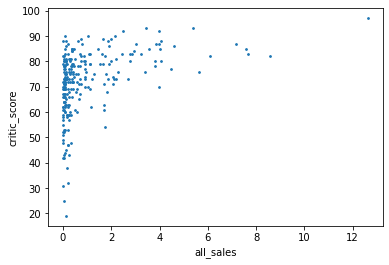

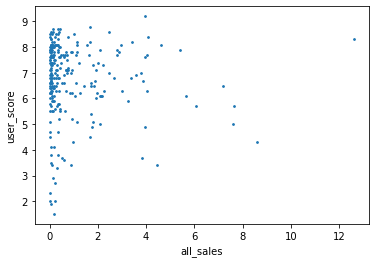

In [75]:
lucky_PS4=platform_box_PS4[['all_sales', 'critic_score', 'user_score']]
lucky_PS4 = lucky_PS4.query('critic_score>=0 and user_score>=0') #избавляемся от заглушек

lucky_PS4[ ['all_sales', 'critic_score'] ].plot.scatter(0, 1, s=3)
plt.xlabel('all_sales')
plt.ylabel('critic_score')

lucky_PS4[ ['all_sales', 'user_score'] ].plot.scatter(0, 1, s=3)
plt.xlabel('all_sales')
plt.ylabel('user_score')
lucky_PS4.corr() 

**Вывод**

Число проданных копий имеет прямую корреляцию с количеством вышедших игр. Есть не большая положительная корреляция связанная с ростом количества высоких балов критиков и количеством проданных копий. Прослеживается положительная корреляция пользовательских оценок с оценками критиков. Число проданных копий с оценками пользователей корреляцию не имеют. Пользователи в основном опираются на мнение критиков, а не на мнение других пользователей при покупке.

,all_sales,critic_score,user_score
all_sales,1.000000,0.257261,0.003596
critic_score,0.257261,1.000000,0.555199
user_score,0.003596,0.555199,1.000000


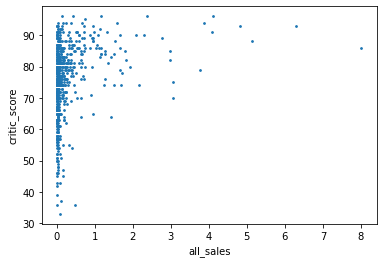

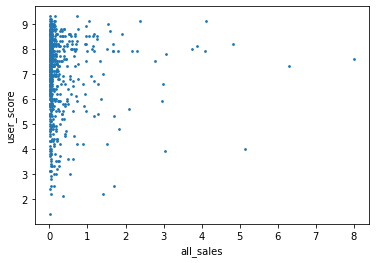

In [76]:
lucky_PC=platform_box_PC[[ 'all_sales', 'critic_score', 'user_score']]
lucky_PC = lucky_PC.query('critic_score>=0 and user_score>=0') #избавляемся от заглушек


lucky_PC[ ['all_sales', 'critic_score'] ].plot.scatter(0, 1, s=3)
plt.xlabel('all_sales')
plt.ylabel('critic_score')

lucky_PC[ ['all_sales', 'user_score'] ].plot.scatter(0, 1, s=3)
plt.xlabel('all_sales')
plt.ylabel('user_score')

lucky_PC.corr() 

,all_sales,critic_score,user_score
all_sales,1.000000,0.410422,-0.094003
critic_score,0.410422,1.000000,0.472462
user_score,-0.094003,0.472462,1.000000


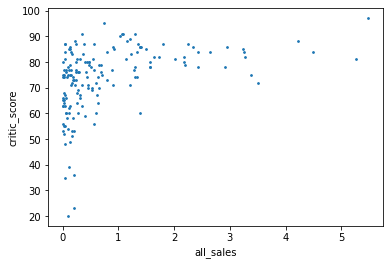

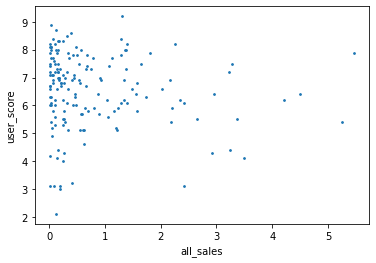

In [80]:
lucky_XOne=platform_box_XOne[[ 'all_sales', 'critic_score', 'user_score']]
lucky_XOne =lucky_XOne.query('critic_score>=0 and user_score>=0') #избавляемся от заглушек

lucky_XOne[ ['all_sales', 'critic_score'] ].plot.scatter(0, 1, s=3)
plt.xlabel('all_sales')
plt.ylabel('critic_score')

lucky_XOne[ ['all_sales', 'user_score'] ].plot.scatter(0, 1, s=3)
plt.xlabel('all_sales')
plt.ylabel('user_score')

lucky_XOne.corr() 

,all_sales,critic_score,user_score
all_sales,1.000000,0.338904,0.232089
critic_score,0.338904,1.000000,0.745222
user_score,0.232089,0.745222,1.000000


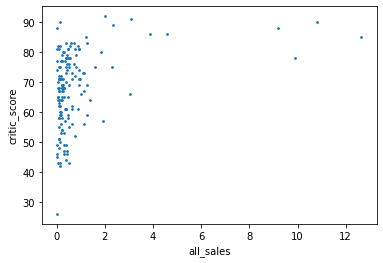

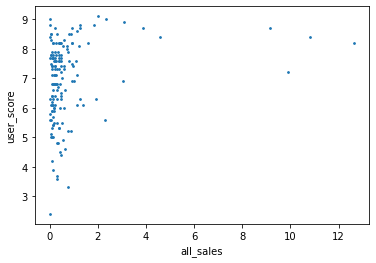

In [81]:
lucky_3DS=platform_box_3DS[[ 'all_sales', 'critic_score', 'user_score']] 
lucky_3DS =lucky_3DS.query('critic_score>=0 and user_score>=0')

lucky_3DS[ ['all_sales', 'critic_score'] ].plot.scatter(0, 1, s=3)
plt.xlabel('all_sales')
plt.ylabel('critic_score')

lucky_3DS[ ['all_sales', 'user_score'] ].plot.scatter(0, 1, s=3)
plt.xlabel('all_sales')
plt.ylabel('user_score')

lucky_3DS.corr() 

**Вывод**

В общем тенденции в продажах на разных платформах сохраняются, Оценки пользователей хорошо коррелируют с оценками критиков, большим теражом часто расходятся игры с оценкой критиков более 60 и оценкой пользователей больше 6. Стоит отметить, что игры имеющие хорошую оценку критиков не всегда имеют хорошие продажи. Не все шедевры игроки оценивают по достоинству.

Популярные жанры на PS4

In [105]:
lucky_genre_PS4=platform_box_PS4.pivot_table(index='genre', values='all_sales', aggfunc=['mean', 'median']).reset_index()  #сортировка по убыванию
lucky_genre_PS4.columns = ['genre','mean','median']
display(lucky_genre_PS4.sort_values(by='mean', ascending=False))

,genre,mean,median
8,Shooter,2.160000,0.970
10,Sports,1.208913,0.525
0,Action,0.667361,0.155
4,Platform,0.640833,0.300
6,Racing,0.638947,0.230
7,Role-Playing,0.568431,0.200
2,Fighting,0.480556,0.170
3,Misc,0.409500,0.075
1,Adventure,0.226429,0.070
9,Simulation,0.205000,0.210


Популярные жанры на XOne

In [107]:
lucky_genre_XOne=platform_box_XOne.pivot_table(index='genre', values='all_sales', aggfunc=['mean', 'median']).reset_index()  #сортировка по убыванию
lucky_genre_XOne.columns = ['genre','mean','median']
display(lucky_genre_XOne.sort_values(by='mean', ascending=False))

,genre,mean,median
7,Shooter,1.587632,1.095
6,Role-Playing,0.753571,0.320
9,Sports,0.703684,0.335
5,Racing,0.489500,0.185
0,Action,0.438941,0.150
3,Misc,0.391053,0.180
2,Fighting,0.350000,0.200
1,Adventure,0.191429,0.060
4,Platform,0.186000,0.160
8,Simulation,0.172500,0.160


Популярные жанры на PC

In [108]:
lucky_genre_PC=platform_box_PC.pivot_table(index='genre', values='all_sales', aggfunc=['mean', 'median']).reset_index()  #сортировка по убыванию
lucky_genre_PC.columns = ['genre','mean','median']
display(lucky_genre_PC.sort_values(by='mean', ascending=False))

,genre,mean,median
7,Role-Playing,0.458738,0.070
9,Simulation,0.437583,0.050
3,Misc,0.381818,0.020
8,Shooter,0.298639,0.080
11,Strategy,0.247027,0.040
10,Sports,0.239400,0.040
0,Action,0.185000,0.060
1,Adventure,0.154154,0.040
6,Racing,0.065172,0.035
4,Platform,0.041818,0.030


Популярные жанры на 3DS

In [110]:
platform_box_3DS
lucky_genre_3DS=platform_box_3DS.pivot_table(index='genre', values='all_sales', aggfunc=['mean', 'median']).reset_index()  #сортировка по убыванию
lucky_genre_3DS.columns = ['genre','mean','median']
display(lucky_genre_3DS.sort_values(by='mean', ascending=False))

,genre,mean,median
6,Racing,1.487000,0.210
4,Platform,1.161786,0.220
7,Role-Playing,0.967816,0.220
9,Simulation,0.929655,0.160
2,Fighting,0.754286,0.115
0,Action,0.309305,0.100
5,Puzzle,0.278500,0.100
10,Sports,0.246000,0.140
3,Misc,0.203519,0.115
8,Shooter,0.203333,0.065


**Вывод**

1. Наиболее популярные и прибыльные жанры на PS4 это Shooter и Sports. Данные жанры имеют наибольшее значение среднего и медианного значения от продаж.
2. Наиболее популярные и прибыльные жанры на XOne это Shooter
3. На PC  наиболее популярные и прибыльные Role-Playing и Simulation, но у них сильно различаются медианное и среднее значение, что говорит о достаточно большом количестве мало покупаемых проектов и группе очень популярных проектов.
4. На 3DS ситуасия схожая с РС, наиболее популярные и прибыльные Racing и Platform, но опять сильно различаются медианное и среднее значение, значит хорошо продается только не большая группа игр в этих жанрах.
5. По полученным данным видно, что для каждой платформы хорошую продаваемость показывает разный жанр, притом внутри жанра продажи могут идти так же очень не равномерно, не многие проекты оказываются сверх популярные.

##  Портрет пользователей

Популярные платформы в регионах eu, jp, na

In [112]:
platform_region=data_frame[data_frame['year_of_release']>=2013] #Выбор актуального периода
platform_region=platform_region[['platform','na_sales','eu_sales','jp_sales']]
platform_region=platform_region.pivot_table(index='platform', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum').sort_values(by='na_sales', ascending=False)
display('Топ регион NA', platform_region.head(10))

platform_region=platform_region.sort_values(by='jp_sales', ascending=False)
display('Топ регион JP', platform_region.head(10))

platform_region=platform_region.sort_values(by='eu_sales', ascending=False)
display('Топ регион EU', platform_region.head(10))

'Топ регион NA'

,eu_sales,jp_sales,na_sales
platform,,,
PS4,141.09,15.96,108.74
XOne,51.59,0.34,93.12
X360,42.52,0.51,81.66
PS3,67.81,23.35,63.50
3DS,30.96,67.81,38.20
WiiU,19.85,10.88,29.21
PC,25.36,0.00,11.11
Wii,5.93,0.05,6.56
PSV,6.10,18.59,5.04


'Топ регион JP'

,eu_sales,jp_sales,na_sales
platform,,,
3DS,30.96,67.81,38.20
PS3,67.81,23.35,63.50
PSV,6.10,18.59,5.04
PS4,141.09,15.96,108.74
WiiU,19.85,10.88,29.21
PSP,0.17,3.29,0.00
X360,42.52,0.51,81.66
XOne,51.59,0.34,93.12
Wii,5.93,0.05,6.56


'Топ регион EU'

,eu_sales,jp_sales,na_sales
platform,,,
PS4,141.09,15.96,108.74
PS3,67.81,23.35,63.50
XOne,51.59,0.34,93.12
X360,42.52,0.51,81.66
3DS,30.96,67.81,38.20
PC,25.36,0.00,11.11
WiiU,19.85,10.88,29.21
PSV,6.10,18.59,5.04
Wii,5.93,0.05,6.56


**Вывод** 

1. В регионе NA самой популярной платформой является  PS4
2. В регионе JP самой популярной платформой является 3DS
3. В регионе EU самой популярной платформой является PS4

Самые популярные жанры (топ-5)

In [115]:
genre_region=data_frame[data_frame['year_of_release']>=2013] #Выбор актуального периода
genre_region=genre_region[['genre','na_sales','eu_sales','jp_sales']]
genre_region=genre_region.pivot_table(index='genre', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum').sort_values(by='na_sales', ascending=False)
display('Топ жантов в регионе NA', genre_region.head(5))

genre_region=genre_region.sort_values(by='jp_sales', ascending=False)
display('Топ жантов в регионе JP', genre_region.head(5))

genre_region=genre_region.sort_values(by='eu_sales', ascending=False)
display('Топ жантов в регионе EU', genre_region.head(5))

'Топ жантов в регионе NA'

,eu_sales,jp_sales,na_sales
genre,,,
Action,118.13,40.49,126.05
Shooter,87.86,6.61,109.74
Sports,60.52,5.41,65.27
Role-Playing,36.97,51.04,46.40
Misc,20.04,9.20,27.49


'Топ жантов в регионе JP'

,eu_sales,jp_sales,na_sales
genre,,,
Role-Playing,36.97,51.04,46.40
Action,118.13,40.49,126.05
Misc,20.04,9.20,27.49
Fighting,8.55,7.65,15.55
Shooter,87.86,6.61,109.74


'Топ жантов в регионе EU'

,eu_sales,jp_sales,na_sales
genre,,,
Action,118.13,40.49,126.05
Shooter,87.86,6.61,109.74
Sports,60.52,5.41,65.27
Role-Playing,36.97,51.04,46.40
Racing,20.19,2.30,12.96


**Вывод** 

1. В регионе NA самыми популярными жанрами являются платформой является Action, Shooter, Sports, Role-Playing, Misc
2. В регионе JP самыми популярными жанрами являются платформой является Role-Playing, Action, Misc, Sports, Fighting, Shooter 
3. В регионе EU самыми популярными жанрами являются платформой является Action, Shooter, Sports, Role-Playing, Racing

Можно сказать что в регионах NA и EU предпочитают практически одинаковые жанры, а в регионе JP предпочитают несколько другие жанры это нужно учитывать 

Влияние рейтинга ESRB на продажи в отдельном регионе

In [25]:
rating_region=data_frame[['rating','na_sales','eu_sales','jp_sales']]
rating_region=rating_region.pivot_table(index='rating', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum').sort_values(by='na_sales', ascending=False)
display('Топ по рейтингу игр в регионе NA', rating_region.head(5))

rating_region=rating_region.sort_values(by='jp_sales', ascending=False)
display('Топ по рейтингу игр в регионе JP', rating_region.head(5))

rating_region=rating_region.sort_values(by='eu_sales', ascending=False)
display('Топ по рейтингу игр в регионе EU', rating_region.head(5))

'Топ по рейтингу игр в регионе NA'

,eu_sales,jp_sales,na_sales
rating,,,
E,703.87,197.96,1274.24
N/R,609.65,836.74,1225.84
T,421.79,150.70,747.60
M,480.00,63.58,742.89
E10+,183.35,40.20,345.50


'Топ по рейтингу игр в регионе JP'

,eu_sales,jp_sales,na_sales
rating,,,
N/R,609.65,836.74,1225.84
E,703.87,197.96,1274.24
T,421.79,150.70,747.60
M,480.00,63.58,742.89
E10+,183.35,40.20,345.50


'Топ по рейтингу игр в регионе EU'

,eu_sales,jp_sales,na_sales
rating,,,
E,703.87,197.96,1274.24
N/R,609.65,836.74,1225.84
M,480.00,63.58,742.89
T,421.79,150.70,747.60
E10+,183.35,40.20,345.50


**Вывод** 

1. В регионе NA игры с рейтингом Е самые популярные
2. В регионе JP игры без рейтинга самые популярные
3. В регионе EU игры с рейтингом Е самые популярные

Можно сказать что продажи зависят от рейтинга везде 1-е и 2-е место занимают рейтинг E и игры без рейтинга. Популярные игры без рейтинга, возможно это игры казуальные, для детей и подростков и соответственно без каких либо ограничений, а в японском регионе очень много играют с малого возраста, поэтому игры без рейтинга там на первом месте.

## Проверьте гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые (гипотеза H0)
альтернативная гипотеза (Н1) средние пользовательские рейтинги платформ Xbox One и PC различаются

In [26]:
# срез по оценкам и платформам
rating_score_PC=data_frame[['user_score','platform']].query('platform == "PC"')
rating_score_XOne=data_frame[['user_score','platform']].query('platform == "XOne"')

alpha = .01

results=scipy.stats.ttest_ind(rating_score_XOne['user_score'],rating_score_PC['user_score'])
print('p-значение:', results.pvalue)
print('статистика:', results.statistic)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу Н0")
else:
    print("Не отвергаем нулевую гипотезу Н0") 

p-значение: 0.0012416335612875612
статистика: -3.2368308465622517
Отвергаем нулевую гипотезу Н0


**Вывод** 

Гипотеза Н0 не верна, т.к. результат не удовлетворил условие 0.01, выбираем альтернативную гипотезу (Н1), что оценки на платформах Xbox One и PC разные.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые (Н0)
альтернативная гипотеза (Н1) средние пользовательские рейтинги жанров Action и Sports разные

In [27]:
# срез по оценкам и платформам и фильтр нужных жанров
rating_genre_Action=data_frame[['user_score','genre']].query('genre == "Action"')
rating_genre_Sports=data_frame[['user_score','genre']].query('genre == "Sports"')

alpha = .01

results=scipy.stats.ttest_ind(rating_genre_Action['user_score'],rating_genre_Sports['user_score'])
print('p-значение:', results.pvalue)
print('статистика:', results.statistic)

if results.pvalue < alpha:
    
   
    print("Отвергаем нулевую гипотезу Н0")
else:
    print("Не отвергаем нулевую гипотезу Н0") 

p-значение: 7.872830248017558e-09
статистика: 5.779991660757486
Отвергаем нулевую гипотезу Н0


**Вывод** 

Гипотеза (Н0) верна, значение результата сравнения больше условия 0.01, таким образом отбрасываем альтернативную гипотезу (Н1)